#                                  Microsoft stock market prediction









##                                                                                                                       Nidal Souk
##                                                                                                                       Aduayom Messan
##                                                                                                                       Krah kouamé

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
microsoft = pd.read_csv('C:/Users/nidal/OneDrive/Documents/BDD/microsoft_stocks.csv')
microsoft.index = pd.to_datetime(microsoft.Date)
microsoft = microsoft.drop(["Date","Adj Close"],axis=1)
microsoft


,High,Low,Open,Close,Volume
Date,,,,,
2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0
2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0
2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0
2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0
2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0
...,...,...,...,...,...
2022-08-26,280.339996,267.980011,279.079987,268.089996,27549300.0
2022-08-29,267.399994,263.850006,265.850006,265.230011,20338500.0
2022-08-30,267.049988,260.660004,266.670013,262.970001,22767100.0


## Statistique descriptive

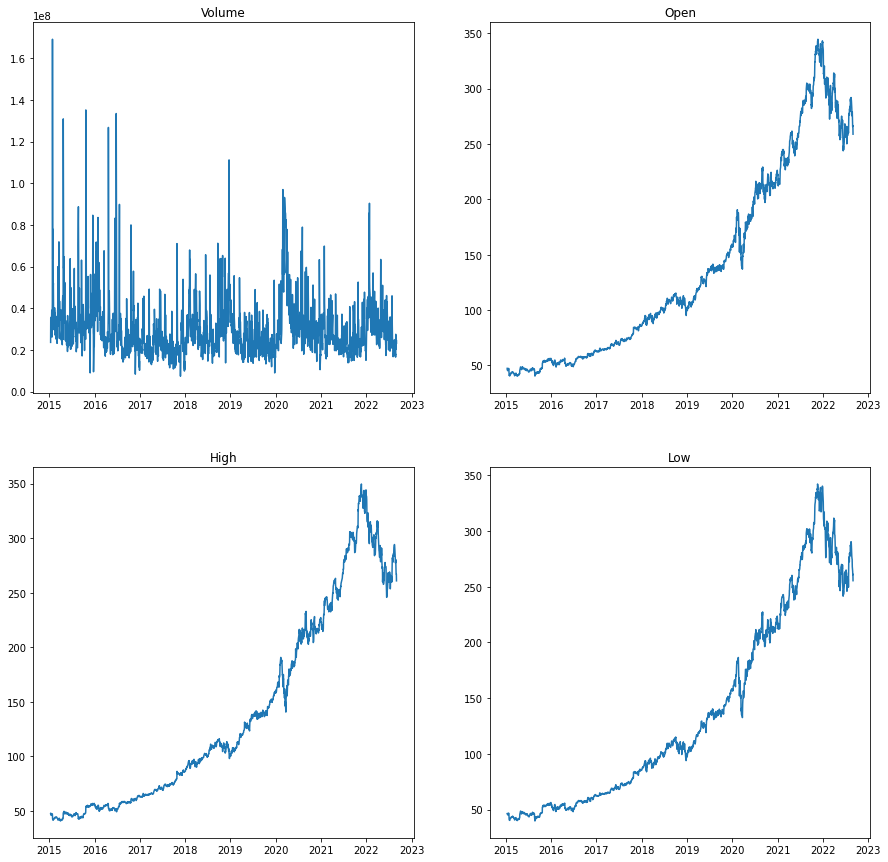

In [3]:

# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Get the angles from 0 to 2 pie (360 degree) in narray object
X = microsoft.index
  
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = microsoft["Volume"]
Y2 = microsoft["Open"]
Y3 = microsoft["High"]
Y4 = microsoft["Low"]
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2,figsize=(15,15))

  
# For Sine Function
axis[0, 0].plot(X, Y1,)
axis[0, 0].set_title("Volume")
  
# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Open")
  
# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("High")
  
# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Low")
# Combine all the operations and display
plt.show()

<AxesSubplot:title={'center':'Close'}, xlabel='Date'>

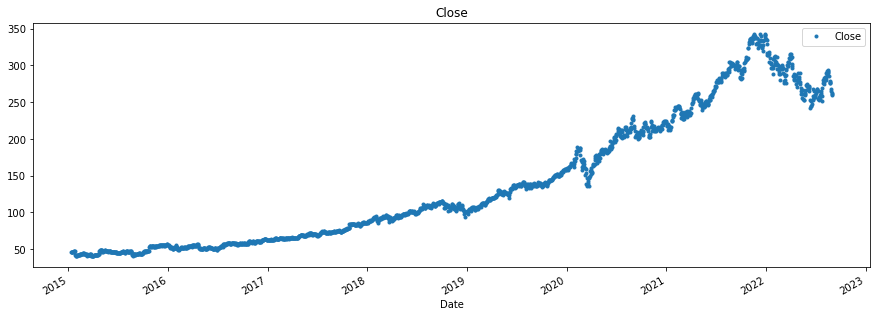

In [4]:
color_pal=sns.color_palette()
microsoft.plot.line(y="Close",
                    style='.',
                    figsize=(15,5),
                    color=color_pal[0],
                    use_index=True,title='Close')


## Train/Test Split


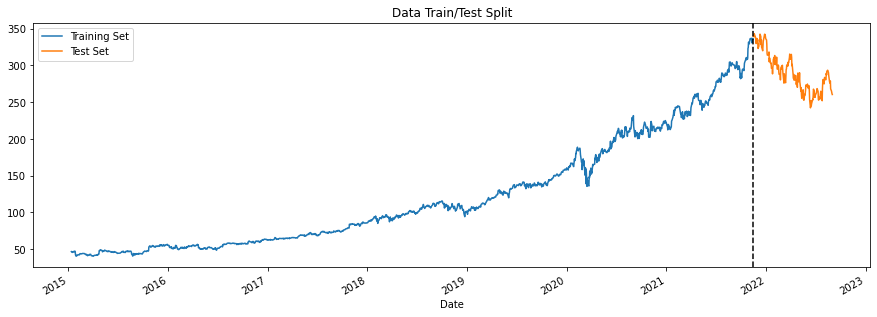

In [5]:
train = microsoft.iloc[:-200]
test = microsoft.iloc[-200:]
fig, ax=plt.subplots(figsize=(15,5))
train.plot.line(y="Close",ax=ax,label='Training Set',title = "Data Train/Test Split",color=color_pal[0])
test.plot.line(y="Close",ax=ax,label='Test Set',color=color_pal[1])
ax.axvline(test.index[0],color='black',ls='--')
ax.legend(['Training Set','Test Set'])
plt.show()

## Régression linéaire

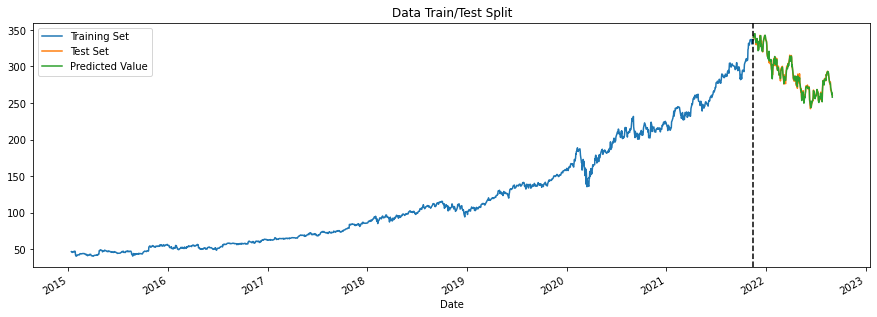

In [6]:
# Train/Test Split
from sklearn.linear_model import LinearRegression
Best_Train_Score = []
Best_Test_Score = []
model = LinearRegression()
train = microsoft.iloc[:-200]
test = microsoft.iloc[-200:]
predictors = [ "Volume", "Open", "High", "Low"]
regr=model.fit(train[predictors], train["Close"])
y_pred_train=regr.predict(train[predictors])
y_pred_test=regr.predict(test[predictors])
train["y_pred"]=y_pred_train
test["y_pred"]=y_pred_test
fig, ax=plt.subplots(figsize=(15,5))
train.plot.line(y="Close",ax=ax,label='Training Set',title = "Data Train/Test Split",color=color_pal[0])
test.plot.line(y="Close",ax=ax,label='Test Set',color=color_pal[1])
test.plot.line(y="y_pred",ax=ax,label='Predicted',color=color_pal[2])
ax.axvline(test.index[0],color='black',ls='--')
ax.legend(['Training Set','Test Set','Predicted Value'])
plt.show()

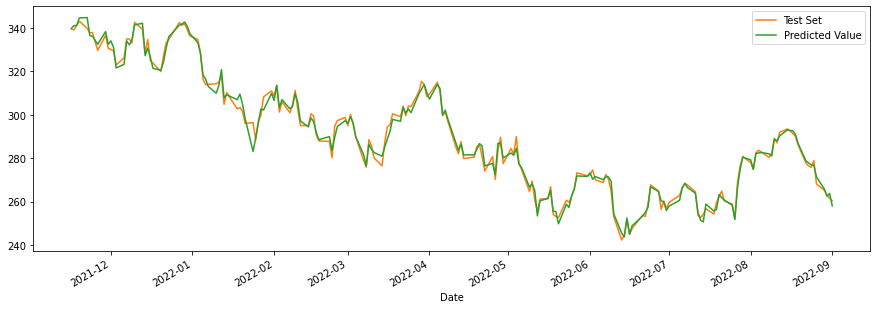

In [7]:
fig, ax=plt.subplots(figsize=(15,5))
test.plot.line(y="Close",ax=ax,label='Test Set',color=color_pal[1])
test.plot.line(y="y_pred",ax=ax,label='Predicted',color=color_pal[2])
ax.legend(['Test Set','Predicted Value'])
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(test["Close"], test["y_pred"]))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test["Close"], test["y_pred"]))

Mean squared error: 5.48
Coefficient of determination: 0.99


## Construire une nouvelle variable binaire qui sera notre target et qui est défini par :

In [9]:
from sklearn.metrics import precision_score

microsoft["Target"] = (microsoft["Close"] > microsoft["Open"]).astype(int)
train = microsoft.iloc[:-200]
test = microsoft.iloc[-200:]
train["LinregPred"]=regr.predict(train[predictors])
test["LinregPred"]=regr.predict(test[predictors])
train["Target1"]= (train["LinregPred"] > train["Open"]).astype(int)
test["Target1"] = (test["LinregPred"] > test["Open"]).astype(int)
print('train set precision score :',precision_score(train["Target"], train["Target1"]))
print('test set precision score :',precision_score(test["Target"], test["Target1"]))

Best_Train_Score.append(precision_score(train["Target"], train["Target1"]))
Best_Test_Score.append(precision_score(test["Target"], test["Target1"]))
microsoft

train set precision score : 0.842443729903537
test set precision score : 0.8173076923076923


,High,Low,Open,Close,Volume,Target
Date,,,,,,
2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,0
2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,0
2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,0
2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,0
2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,1
...,...,...,...,...,...,...
2022-08-26,280.339996,267.980011,279.079987,268.089996,27549300.0,0
2022-08-29,267.399994,263.850006,265.850006,265.230011,20338500.0,0
2022-08-30,267.049988,260.660004,266.670013,262.970001,22767100.0,0


## KNN 

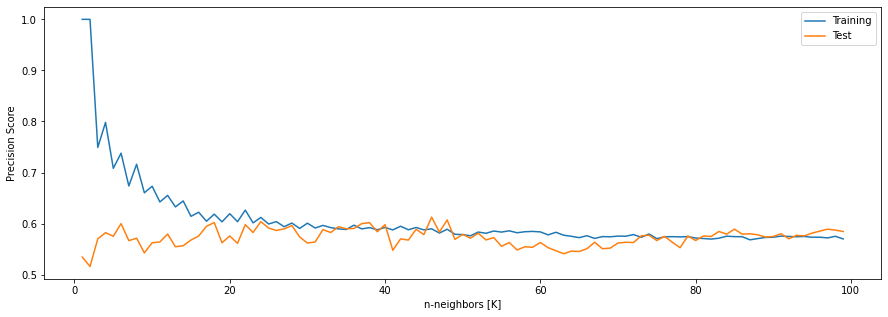

In [10]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

# Set n_neighbors from 1 to 20
neighbors_settings = range(1, 100)

for nn in neighbors_settings:
    # fit the model
    knnreg = KNeighborsClassifier(n_neighbors=nn)
    knnreg.fit(train[predictors], train["Target"])
    train_pred_KNN=knnreg.predict(train[predictors])
    test_pred_KNN=knnreg.predict(test[predictors])
    # record training set accuracy
    training_accuracy.append(precision_score(train["Target"],train_pred_KNN))
    # record generalization accuracy
    test_accuracy.append(precision_score(test["Target"],test_pred_KNN))
plt.subplots(figsize=(15,5))
plt.plot(neighbors_settings, training_accuracy, label='Training')
plt.plot(neighbors_settings, test_accuracy, label='Test')
plt.ylabel('Precision Score')
plt.xlabel('n-neighbors [K]')
plt.legend()




In [11]:
substract=[]
    
print('Best number of trees : 18')

knnreg = KNeighborsClassifier(n_neighbors=24)
knnreg.fit(train[predictors], train["Target"])
train_pred_KNN=knnreg.predict(train[predictors])
test_pred_KNN=knnreg.predict(test[predictors])
print('Precision Score Train Set KNN :',precision_score(train["Target"],train_pred_KNN))
print('Precision Score Test Set KNN:' ,precision_score(test["Target"],test_pred_KNN))
Best_Train_Score.append(precision_score(train["Target"],train_pred_KNN))
Best_Test_Score.append(precision_score(test["Target"],test_pred_KNN))

Best number of trees : 18
Precision Score Train Set KNN : 0.6120959332638165
Precision Score Test Set KNN: 0.6039603960396039


## Logistic Regression

Precision Score Training Set : 0.5315942028985507
Precision Score Test Set : 0.48


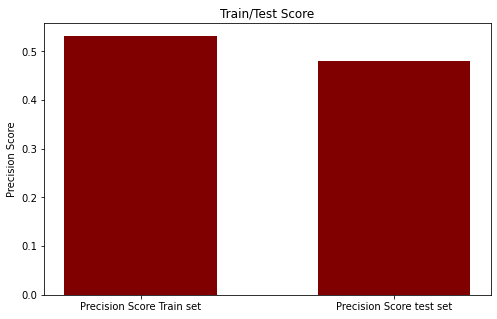

In [12]:
from sklearn.metrics import classification_report
logreg = LogisticRegression().fit(train[predictors], train["Target"]).score(train[predictors], train["Target"])
print('Precision Score Training Set :' , logreg)
logreg1 = LogisticRegression().fit(test[predictors], test["Target"]).score(test[predictors], test["Target"])
print('Precision Score Test Set :' , logreg1)


#print(classification_report(test["Target"],y_pred))

#print(y_pred)

data = {'Precision Score Train set':logreg, 'Precision Score test set':logreg1}
Precision_Score = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(Precision_Score, values, color ='maroon',width = 0.6,align='center')
 

plt.ylabel("Precision Score")
plt.title("Train/Test Score")
plt.show()

Best_Train_Score.append(logreg)
Best_Test_Score.append(logreg1)

## RandomForestClassifier

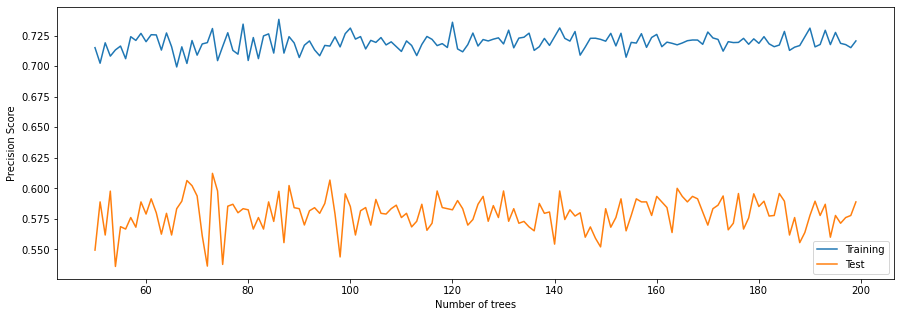

In [13]:
from sklearn.ensemble import RandomForestClassifier
training_accuracy = []
test_accuracy = []


neighbors_settings = range(50, 200)

for nn in neighbors_settings:
    randfor=RandomForestClassifier(n_estimators=nn, min_samples_split=100)
    randfor.fit(train[predictors], train["Target"])
    train_pred_RF=randfor.predict(train[predictors])
    test_pred_RF=randfor.predict(test[predictors])
    training_accuracy.append(precision_score(train["Target"],train_pred_RF))
    test_accuracy.append(precision_score(test["Target"],test_pred_RF))
plt.subplots(figsize=(15,5))
plt.plot(neighbors_settings, training_accuracy, label='Training')
plt.plot(neighbors_settings, test_accuracy, label='Test')
plt.ylabel('Precision Score')
plt.xlabel('Number of trees')
plt.legend()
##

    

In [15]:
substract=[]

for n1,n2 in zip(training_accuracy,test_accuracy):
    substract.append(n1-n2)
    
print('Best number of trees : ', substract.index(min(substract)) + 50 )

randfor=RandomForestClassifier(n_estimators=substract.index(min(substract)), min_samples_split=100)
randfor.fit(train[predictors], train["Target"])
train_pred_RF=randfor.predict(train[predictors])
test_pred_RF=randfor.predict(test[predictors])
Best_Train_Score.append(precision_score(train["Target"],train_pred_RF))
Best_Test_Score.append(precision_score(test["Target"],test_pred_RF))


Best number of trees :  68


In [16]:
print(Best_Train_Score) 
print(Best_Test_Score)

[0.842443729903537, 0.6120959332638165, 0.5315942028985507, 0.6901669758812616]
[0.8173076923076923, 0.6039603960396039, 0.48, 0.5729166666666666]


## Conclusion et meilleur modèle

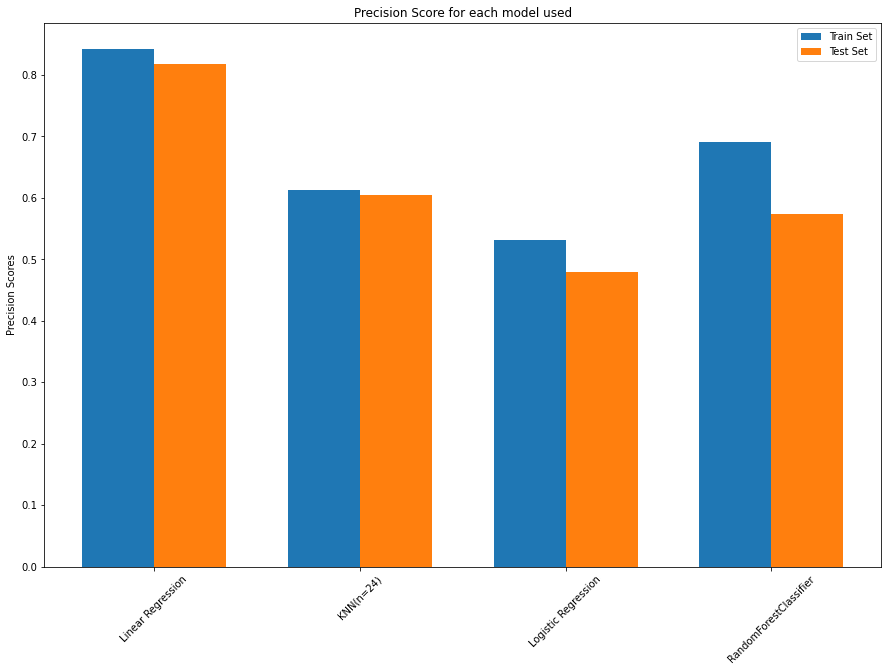

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)


ind = np.arange(4)   
width = 0.35                

rects1 = ax.bar(ind, Best_Train_Score, width,
                color=color_pal[0])

rects2 = ax.bar(ind+width, Best_Test_Score, width,color=color_pal[1])


ax.set_ylabel('Precision Scores')
ax.set_title('Precision Score for each model used')
xTickMarks = ['Linear Regression','KNN(n=24)','Logistic Regression','RandomForestClassifier']
ax.set_xticks(ind+width/2)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.legend( (rects1[0], rects2[0]), ('Train Set','Test Set') )

plt.show()